.ipynb settings

In [15]:
#Settings relative to .ipynb file format that have to be executed here

#Make reloading of modules automatic et évite d'avoir à redémarer le kernel et tout re executer pour appliquer la modification d'un module dans __main__.
%load_ext autoreload  
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
#src.useful_functions
import sys
sys.path.append('../src')  # Adjust the path to import modules in src/

import useful_functions



Importation of the dataset(s) and pipeline(s)

In [17]:
#Importing dataset(s)
from data import make_dataset
from pipeline import model


#Load the big datase
feat_engineered_ds = make_dataset.load_data(True, 'interim/feat_engineered_ds')

#Load the train and test datasets:
X_train_00   = make_dataset.load_data(False, 'processed/split/X_train_00')
Y_train_00   = make_dataset.load_data(False, 'processed/split/Y_train_00')
X_test_00   = make_dataset.load_data(False, 'processed/split/X_test_00')
X_test_info_00 = make_dataset.load_data(False, 'processed/split/X_test_info')
Y_test_00   = make_dataset.load_data(False, 'processed/split/Y_test_00')



#Load the not_split train and test datasets:
X   = make_dataset.load_data(False, 'processed/not_split/X')
Y   = make_dataset.load_data(False, 'processed/not_split/Y')
X_info = make_dataset.load_data(False, 'processed/not_split/X_info')



#Load the train lists names
H_A_col_to_concat = make_dataset.load_string_list("H_A_col_to_concat")
names_col_concatenated = make_dataset.load_string_list("names_col_concatenated")
contextual_col = make_dataset.load_string_list("contextual_col")
col_to_remove = make_dataset.load_string_list("col_to_remove")



#Import the trained pipeline
under_testing_pipeline_trained = model.load_pipeline("under_testing_pipeline_trained")


The interim/feat_engineered_ds dataframe contains matchs of the seasons:  [2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


Successfully loaded the list: H_A_col_to_concat
Successfully loaded the list: names_col_concatenated
Successfully loaded the list: contextual_col
Successfully loaded the list: col_to_remove


c:\Users\polol\OneDrive\Documents\ML\Projet Mbappe (11.23- )\Projet Mbappe Cookiestructure\env\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\polol\OneDrive\Documents\ML\Projet Mbappe (11.23- )\Projet Mbappe Cookiestructure\env\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SelectKBest from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\polol\OneDrive\Documents\ML\Projet Mbappe (11.23- )\Projet Mba

Successfully loaded the pipeline: under_testing_pipeline_trained




# VII) <u> Pipeline results study

<span style="color:#FF1493;"> <strong> <font size="4">1) Probabilities calibration and distribution study

c:\Users\polol\OneDrive\Documents\ML\Projet Mbappe (11.23- )\Projet Mbappe Cookiestructure\notebooks\../src\pipeline\results.py:493: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  #Y_test


Successfully loaded the datasets: best_pipeline_results


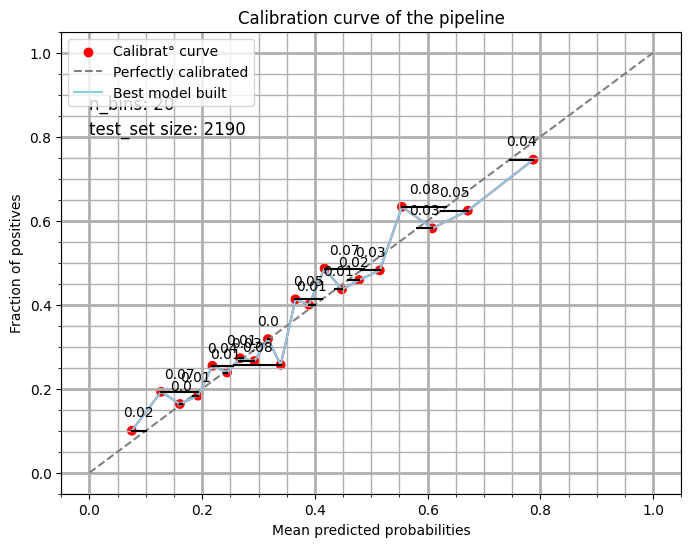

Above learning curve statistics on bins:

╒════╤════════════════╤═════════════════════════════╕
│    │ Bin interval   │   Predictions nb in the bin │
╞════╪════════════════╪═════════════════════════════╡
│  0 │ [0.02, 0.11]   │                         110 │
├────┼────────────────┼─────────────────────────────┤
│  1 │ [0.11, 0.15]   │                         109 │
├────┼────────────────┼─────────────────────────────┤
│  2 │ [0.15, 0.18]   │                         110 │
├────┼────────────────┼─────────────────────────────┤
│  3 │ [0.18, 0.21]   │                         109 │
├────┼────────────────┼─────────────────────────────┤
│  4 │ [0.21, 0.23]   │                         110 │
├────┼────────────────┼─────────────────────────────┤
│  5 │ [0.23, 0.25]   │                         109 │
├────┼────────────────┼─────────────────────────────┤
│  6 │ [0.25, 0.28]   │                         110 │
├────┼────────────────┼─────────────────────────────┤
│  7 │ [0.28, 0.3]    │                 

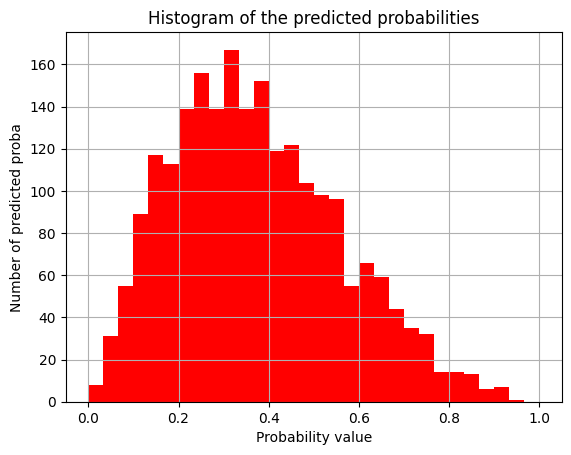

In [18]:
#src.pipeline.results
from pipeline import results
from sklearn.base import clone
from dvclive import Live
from sklearn.metrics import accuracy_score



test_seasons = [2021,2022,2023,2024]

#Make proba predictions retraining the pipeline at every Game Week or every Season:
proba_pred_GW_training, Y_test_00_GW_training, X_info_GW_training = results.proba_prediction_retrained_each_seas(X, Y, X_info, clone(under_testing_pipeline_trained), 'season', test_seasons)



#Make 'normal' proba predictions on the test_seasons (defined in V)1) )
normal_proba_pred = under_testing_pipeline_trained.predict_proba(X_test_00)[:,1]



# We choose wether we plot the graphs on GW training simulations or on 'normal' training simulations
Y_test_01 = Y_test_00_GW_training
X_test_info_01 = X_info_GW_training

proba_pred = proba_pred_GW_training



#Plot Calibration curve of the pipeline and info about its bins
prob_pred_01, prob_true_01 = results.plot_calibration_curve_2(
                                Y_test_0 = Y_test_01.copy(),
                                X_train_0 = X_test_info_01.copy(),
                                proba_pred_0 = proba_pred.copy(),
                                n_bins_0 = 20,
                                strategy_0 = 'quantile',
                                color_0 = 'red',
                                GW_training_or_not = True,
                                best_model_plot = True)

#We display statistics on the pipeline probabilities deviation 
results.print_calibration_stats(prob_pred_01.copy(),
                                prob_true_01.copy(),
                                'non calibrated')

#We plot the histogram of the proba predicted by the non calibrated pipeline
results.plot_histo_predicted_proba(proba_pred.copy(), 30, 'r', 'predicted probabilities')

# Display the ratio (probabilities pred/nb of true targets)
results.ratio_proba__sum_true_target(X_train_00.copy(), Y_train_00.copy(), X_test_00.copy(), Y_test_00.copy(), under_testing_pipeline_trained)


<span style="color:#FF1493;"> <strong> <font size="4">3) Probabilities calibration and distribution study depending on different parameters

Calibration curve of proba predicted on matches where Played_matches_nb C [ 6 , 21 ]


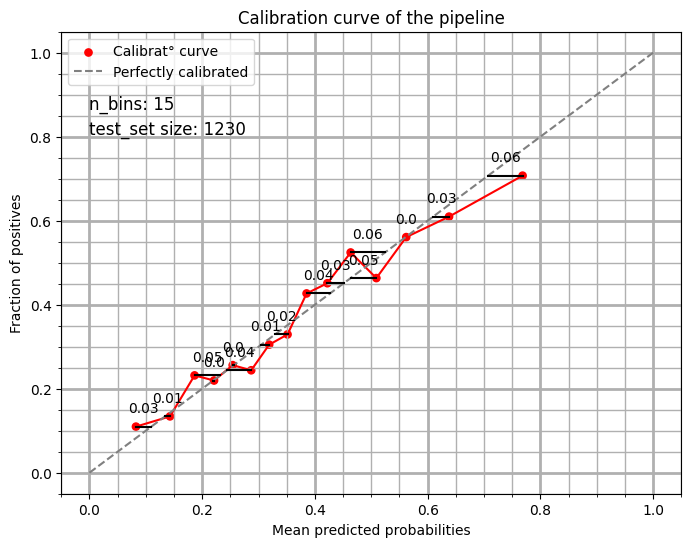

Above learning curve statistics on bins:

╒════╤════════════════╤═════════════════════════════╕
│    │ Bin interval   │   Predictions nb in the bin │
╞════╪════════════════╪═════════════════════════════╡
│  0 │ [0.02, 0.12]   │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  1 │ [0.12, 0.16]   │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  2 │ [0.16, 0.21]   │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  3 │ [0.21, 0.24]   │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  4 │ [0.24, 0.27]   │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  5 │ [0.27, 0.3]    │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  6 │ [0.3, 0.34]    │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  7 │ [0.34, 0.37]   │                 

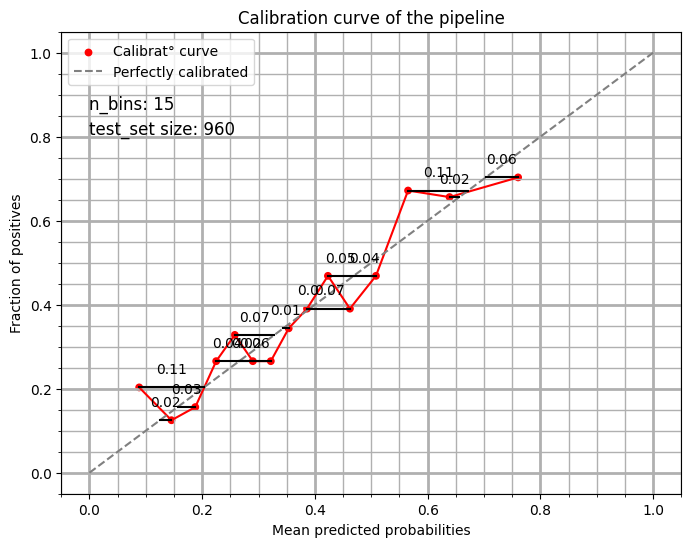

Above learning curve statistics on bins:

╒════╤════════════════╤═════════════════════════════╕
│    │ Bin interval   │   Predictions nb in the bin │
╞════╪════════════════╪═════════════════════════════╡
│  0 │ [0.03, 0.12]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  1 │ [0.12, 0.17]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  2 │ [0.17, 0.21]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  3 │ [0.21, 0.24]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  4 │ [0.24, 0.27]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  5 │ [0.27, 0.31]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  6 │ [0.31, 0.34]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  7 │ [0.34, 0.37]   │                 

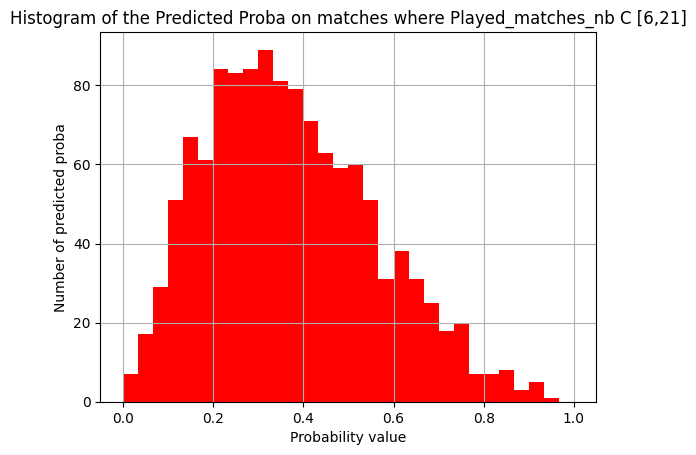

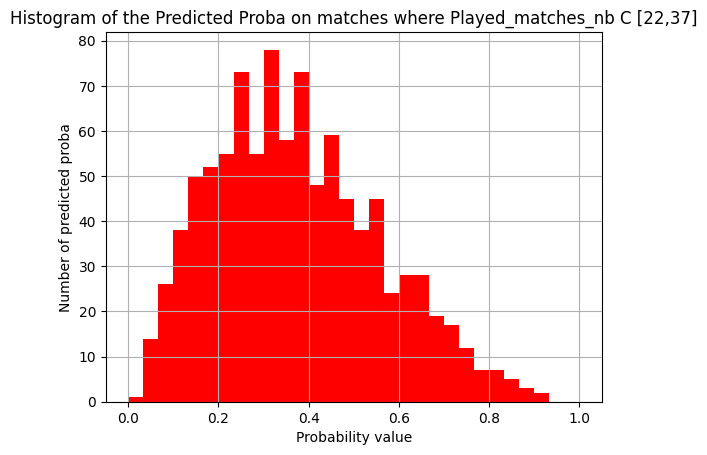

In [19]:
#src.pipeline.analysis

from pipeline import analysis
# We divide the dataframe in n subdataframes classified following the nb of played matches
subdatasets = analysis.calibration_over_season_advancement(2, X_info_GW_training, proba_pred_GW_training, Y_test_00_GW_training)

#Plot Calibration curves for each of these dataframes
results.calibration_curves_subdataframes(subdatasets, 15, 30, True)



<span style="color:#FF1493;"> <strong> <font size="4">4) Model coefficients study

In [20]:
#src.pipeline.results
results.features_coeff_report(under_testing_pipeline_trained, X_train_00)

[[ 0.10498668  0.14193662 -0.12013408  0.03562828  0.23372149  0.04280793
   0.14193662  0.05438027  0.04061288  0.06375981  0.18111942  0.01749094
   0.42893497]]
╒═════════════════════════════════════════════════╤═══════════════╕
│ Feature                                         │   Coefficient │
╞═════════════════════════════════════════════════╪═══════════════╡
│ Diff_Avg_points_pm_ponderated_by_adversary_perf │     0.104987  │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Avg_goal_diff                              │     0.141937  │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Avg_scored_g_conceeded_g_ratio             │    -0.120134  │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Avg_collected_points                       │     0.0356283 │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Annual_budget                              │     0.233721  │
├───────────────────

# VIII) <u> Learning curves

<span style="color:#FF1493;"> <strong> <font size="4">1) Pipeline learning curve

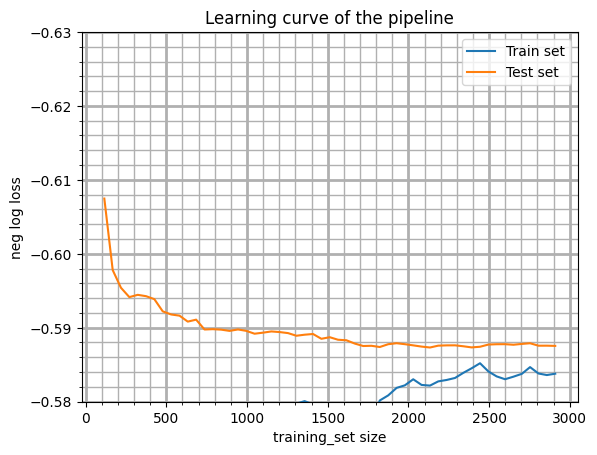

In [21]:
#src.visualization.learning_curves

from visualization import learning_curves

# Plot learning curves for our pipeline
learning_curves.pipeline_learning_curve(X_train_00.copy(),
                                        Y_train_00.copy(),
                                        clone(under_testing_pipeline_trained),
                                        'neg_log_loss',
                                        ylim = [-0.58,-0.63])

<span style="color:#FF1493;"> <strong> <font size="4">2) Calibration curves depending on train set size (out of ordeer so far)

In [22]:
#src.visualization.learning_curves


# We create the subsets (with different train size) used to plot the different learning curves:

# PRECISE PARTITIONNING (30 matchs precision)
     #  I decided not to waste time designing a function for precise partionning. I manually generated test curves that I put in ClickUp


# WIDE PARTITIONNING (1 season precision)
X_train_lc, Y_train_lc, X_test_lc, Y_test_lc = learning_curves.data_formatting_partitionning_seasonally(X, Y, X_info,
[2021,2022,2023], 
[[2020],[2017,2018,2019,2020],  [2015,2016,2017,2018,2019,2020]])

print(X_train_lc)


# Plot the pipeline's learning curves for the different sizes of train_set
#learning_curves.pipeline_calibration_learning_curve(X_train_lc.copy(), X_test_lc.copy(), Y_train_lc.copy(), Y_test_lc.copy(), clone(under_testing_pipeline), 20, 'quantile')

(5828, 16)
(5828, 16)
(5828, 16)
[Empty DataFrame
Columns: [Diff_Avg_points_pm_ponderated_by_adversary_perf, Diff_Avg_goal_diff, Diff_Avg_scored_g_conceeded_g_ratio, Diff_Avg_collected_points, Diff_Annual_budget, Diff_Points_5lm, Diff_Goal_Diff_5lm, Diff_Week_ranking_5lm, Diff_avg_corners_nb, Diff_Avg_shots_nb, Diff_Avg_shots_on_target_nb, Diff_Avg_fouls_nb, Diff_Avg_possession, Diff_Avg_xg, H_A_status, Season_year]
Index: [], Empty DataFrame
Columns: [Diff_Avg_points_pm_ponderated_by_adversary_perf, Diff_Avg_goal_diff, Diff_Avg_scored_g_conceeded_g_ratio, Diff_Avg_collected_points, Diff_Annual_budget, Diff_Points_5lm, Diff_Goal_Diff_5lm, Diff_Week_ranking_5lm, Diff_avg_corners_nb, Diff_Avg_shots_nb, Diff_Avg_shots_on_target_nb, Diff_Avg_fouls_nb, Diff_Avg_possession, Diff_Avg_xg, H_A_status, Season_year]
Index: [], Empty DataFrame
Columns: [Diff_Avg_points_pm_ponderated_by_adversary_perf, Diff_Avg_goal_diff, Diff_Avg_scored_g_conceeded_g_ratio, Diff_Avg_collected_points, Diff_Annual_b

<span style="color:#FF1493;"> <strong> <font size="4">3) Save the pipeline and its results 

In [23]:
# if we judge the pipeline tested performant enough we save it under the status 'chosen' or 'best' if it beats the former best pipeline

# Save the pipeline results
#results.save_pred_proba(proba_pred, Y_test_01, X_test_info_01, "chosen_pipeline_results_x")

# Save the pipeline
#model.save_pipeline(under_testing_pipeline_trained, "chosen_pipeline_trained_x")

